In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [43]:
df=pd.read_csv('landrates.csv')
df

,rate,area
0,450000,1600
1,480000,1800
2,500000,2000
3,540000,2200
4,560000,2600
5,580000,2800
6,600000,3000
7,620000,3200


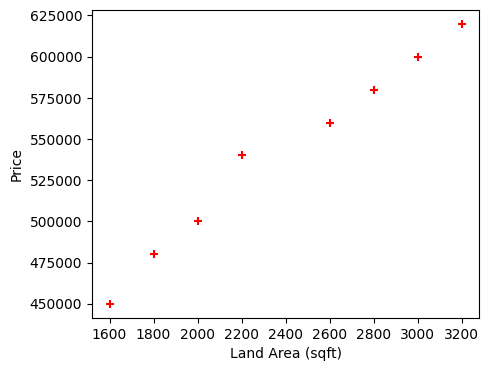

In [44]:
%matplotlib inline
plt.figure(figsize=(5,4))
plt.xlabel('Land Area (sqft)')
plt.ylabel('Price')
plt.scatter(df.area,df.rate,color='r',marker='+')

In [45]:
model=linear_model.LinearRegression()
model.fit(df[['rate']],df.area)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
model.predict([[2300]])

C:\Users\lokes\anaconda3\envs\statsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2800.34799802])

In [47]:
model.predict([[2300],[2400],[2500]])

C:\Users\lokes\anaconda3\envs\statsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2800.34799802, -2799.38309441, -2798.41819081])

In [48]:
model.coef_

array([0.00964904])

In [49]:
model.intercept_

np.float64(-2822.5407810182905)

In [56]:
df1=pd.read_csv('areas.csv')
df1 = df1.rename(columns={"price": "rate"})

In [57]:
prd1 = model.predict(df1)

In [53]:
df1.to_csv('newpredrates.csv',index=False)

In [60]:
from sklearn.linear_model import LinearRegression
X = df[['area']]   # input feature
y = df['rate']     # output target (price)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

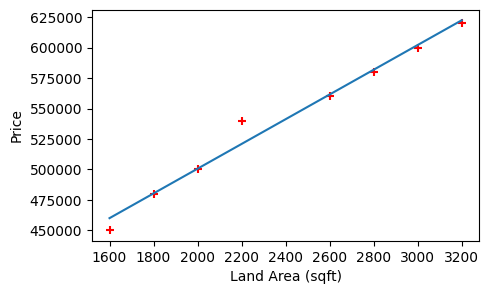

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.xlabel('Land Area (sqft)')
plt.ylabel('Price')
plt.scatter(df.area, df.rate, color='r', marker='+') 
plt.plot(df.area, y_pred) 
plt.show()

In [ ]:
#Data preprocess

In [2]:
import pandas as pd
data=pd.read_csv('houserates.csv')
data

,area,bhk,old,rate
0,1600,2.0,20,3500000
1,2000,3.0,15,3800000
2,2200,NaN,18,4200000
3,2600,3.0,30,4100000
4,3000,4.0,8,6100000


In [5]:
#filling null values
avg_bhk=data['bhk'].median()

In [8]:
data['bhk']=data['bhk'].fillna(avg_bhk)
data

,area,bhk,old,rate
0,1600,2.0,20,3500000
1,2000,3.0,15,3800000
2,2200,3.0,18,4200000
3,2600,3.0,30,4100000
4,3000,4.0,8,6100000


In [22]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[['area','bhk','old']],data['rate'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.coef_

array([    2903.01844606, -1318529.90497485,   -97736.16545556])

In [25]:
model.intercept_

np.float64(3455505.869200671)

In [26]:
model.predict([[3000,4,10]])

C:\Users\lokes\anaconda3\envs\statsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5913079.93292342])

In [27]:
model.predict([[3000,4,5]])

C:\Users\lokes\anaconda3\envs\statsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6401760.76020123])

In [28]:
model.coef_

array([    2903.01844606, -1318529.90497485,   -97736.16545556])

In [29]:
model.intercept_

np.float64(3455505.869200671)

In [73]:
import pandas as pd
area_df=pd.read_csv('area.csv')
area_df

,area,price
0,1000,1244000
1,1200,2088762
2,1500,2165182
3,2000,2122344
4,2200,2246889
5,2600,2578843
6,3000,3005875
7,3200,3184759
8,3400,3565666


In [74]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(area_df[['area']],area_df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
model.predict([[3600]])

C:\Users\lokes\anaconda3\envs\statsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3489292.47956989])

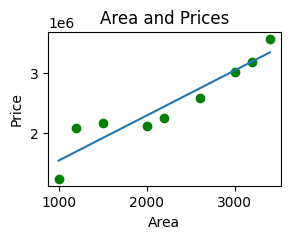

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,2))
plt.title('Area and Prices')
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(area_df['area'],area_df['price'],color='g')
plt.plot(area_df['area'],model.predict(area_df[['area']]))
plt.show()

In [1]:
#Underfitting and Overfitting

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

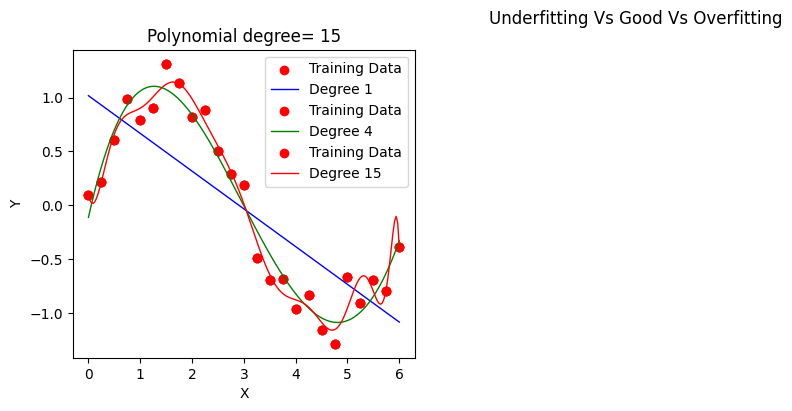

In [18]:
np.random.seed(42)
x=np.linspace(0,6,25).reshape(-1,1)
y=np.sin(x).ravel()+np.random.randn(25)*0.2
degree=[1,4,15]
colors=['blue','green','red']
plt.figure(figsize=(15,4))
for i,d in enumerate(degree,1):
    poly=PolynomialFeatures(degree=d)
    x_poly=poly.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)

    x_test=np.linspace(0,6,200).reshape(-1,1)
    x_test_poly=poly.transform(x_test)
    y_pred=model.predict(x_test_poly)
    
    plt.subplot(1,3,1)
    plt.scatter(x,y,color='red',label='Training Data')
    plt.plot(x_test,y_pred,color=colors[i-1],linewidth=1,label=f"Degree {d}")
    plt.title(f"Polynomial degree= {d}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
plt.suptitle('Underfitting Vs Good Vs Overfitting')
plt.show()